#### Import

In [1]:
%matplotlib notebook

from math import sin, asin, degrees
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import csv
import pandas as pd
from pandas import Series, DataFrame

#### DataFrame Columns

In [2]:
r = 45

player    = np.array(range(r), dtype=object)
obj       = np.array(range(r), dtype=object)
component = np.array(range(r), dtype=object)
side      = np.array(range(r), dtype=object)
axis      = np.array(range(r), dtype=object)

player[:]        = 'marcello'

obj[:12]         = 'bow'
component[:3]    = 'top'
component[3:6]   = 'bottom'
component[6:9]   = 'big'
component[9:12]  = 'small'

obj[12:24]       = 'violin'
component[12:15] = 'scroll'
component[15:18] = 'tailpiece'
component[18:21] = 'left'
component[21:24] = 'right'

obj[24:45]       = 'body'
component[24:27] = 'hand'
component[27:30] = 'wrist'
component[30:33] = 'elbow'
component[33:36] = 'shoulder'
component[36:39] = 'shoulder'
component[39:42] = 'elbow'
component[42:45] = 'wrist'
side[:24]        = ''
side[24:36]      = 'left'
side[36:45]      = 'right'

axis[::3]        = 'x'
axis[1::3]       = 'y'
axis[2::3]       = 'z'

#### Read CSV into DataFrame

In [18]:
rows = 500 # / 12218
df = pd.read_csv('Marcello1.csv', skiprows=[0,1,2,4,5])
marcello = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 47'], axis=1).fillna(method='bfill')
marcello.columns = [obj,component,side,axis]
marcello.columns.names = ['object', 'component', 'side', 'axis']
m = marcello.copy()
m.columns = m.columns.droplevel('side')

#### Calculate bow angle

In [19]:
violin = m.loc[:,'violin'].copy()
bow    = m.loc[:,'bow'].copy()

Take two vectors based on violin points and one vector from the bow

In [20]:
vec1 = violin.scroll - violin.left
vec2 = violin.scroll - violin.right
vec3 = bow.top - bow.big

Calculate the normal to the violin plane by taking the cross-product of the two violin vectors

In [21]:
normal = DataFrame(np.cross(vec1, vec2), columns=['x','y','z'])

Calculate the angle between the vector of the bow and the normal to the violin plane

In [22]:
nom = abs(normal.x*vec3.x + normal.y*vec3.y + normal.z*vec3.z)
den = (normal.x**2 + normal.y**2 + normal.z**2)**.5 * (vec3.x**2 + vec3.y**2 + vec3.z**2)**.5
bow_angle = np.round(np.degrees(np.arcsin(nom/den)),2)

Prepare objects for visualisation

In [23]:
bow    = m.loc[:,'bow'].swaplevel(1,0,axis=1).copy()
violin = m.loc[:,'violin'].swaplevel(1,0,axis=1).copy()
body   = m.loc[:,'body'].swaplevel(1,0,axis=1).copy()

#### Plots

Plot the points as a 3D animation with an annotation for the bow angle

In [10]:
def update_graph(num):
    g_body.set_data (Series(np.array(body.x)[num]),Series(np.array(body.y)[num]))
    g_body.set_3d_properties (Series(np.array(body.z)[num]))
    g_bow.set_data (Series(np.array(bow.x)[num]),Series(np.array(bow.y)[num]))
    g_bow.set_3d_properties (Series(np.array(bow.z)[num]))
    g_violin.set_data (Series(np.array(violin.x)[num]),Series(np.array(violin.y)[num]))
    g_violin.set_3d_properties (Series(np.array(violin.z)[num]))
    title.set_text('frame={}, bow angle={}'.format(num,bow_angle[num]))

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# title = ax.set_title('Bow angle')
# g_bow,    = ax.plot(Series(np.array(bow.x)[0]), Series(np.array(bow.y)[0]), Series(np.array(bow.z)[0]), color='blue')
# g_violin, = ax.plot(Series(np.array(violin.x)[0]), Series(np.array(violin.y)[0]), Series(np.array(violin.z)[0]), color='red')
# g_body,   = ax.plot(Series(np.array(body.x)[0]), Series(np.array(body.y)[0]), Series(np.array(body.z)[0]), color='green')
# ani = animation.FuncAnimation(fig, update_graph, rows, interval=5, blit=False)

Bow angle over time

<IPython.core.display.Javascript object>


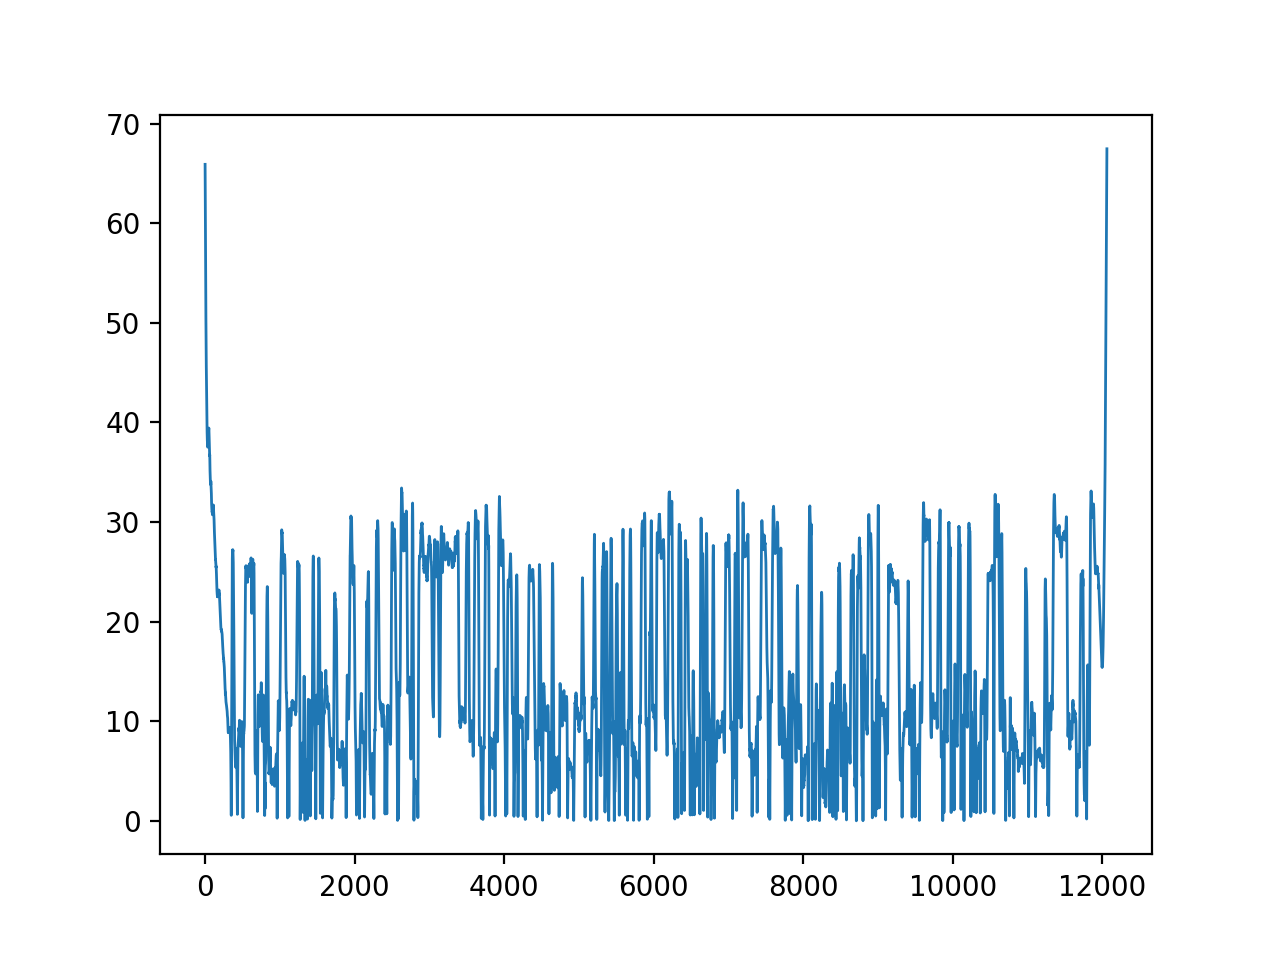

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
l = plt.plot(bow_angle, linewidth=1)

Bow angle histogram

<IPython.core.display.Javascript object>


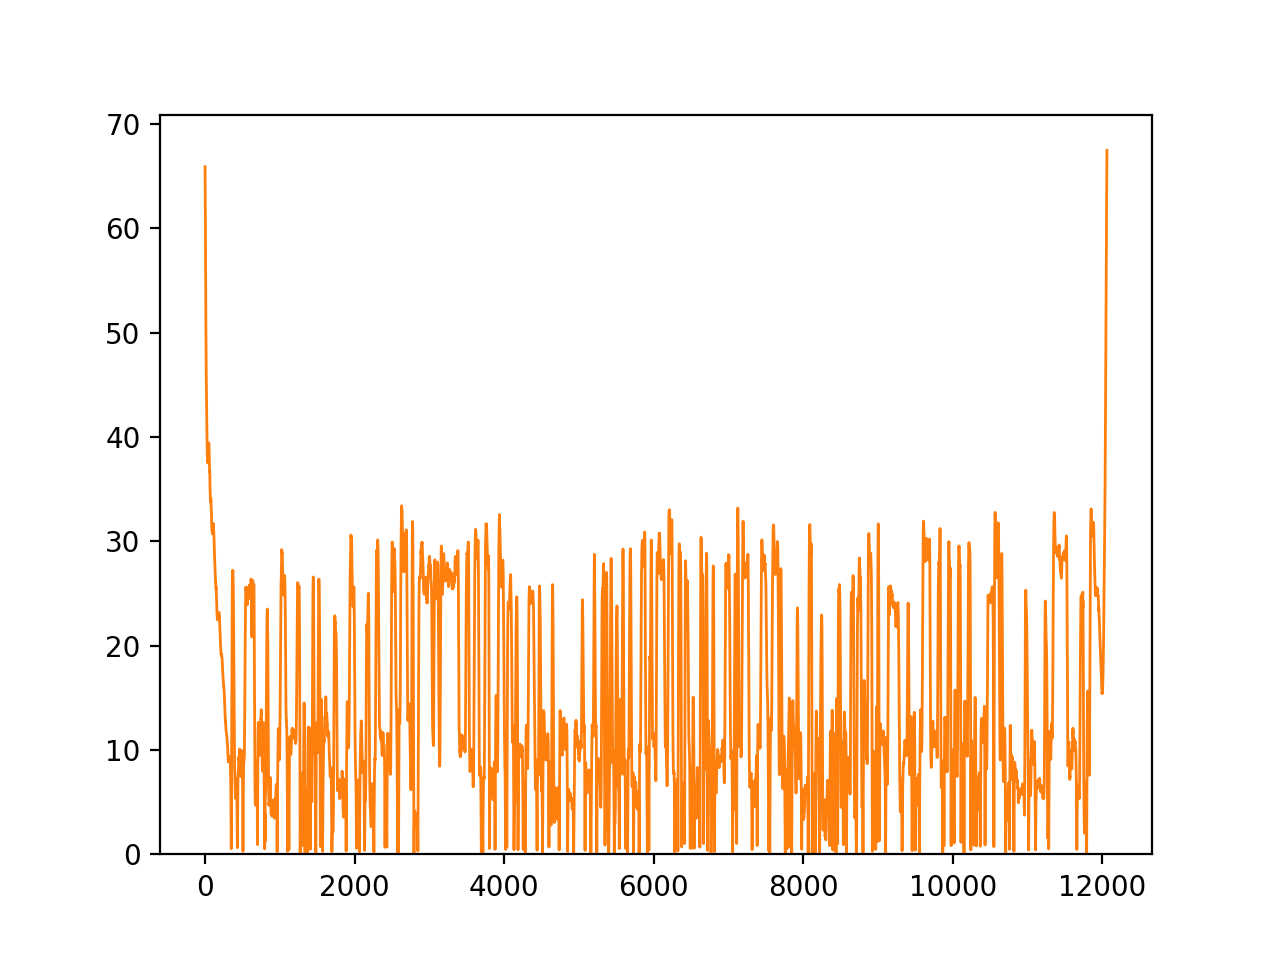

In [24]:
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)


# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)

plt.show()